In [1]:
import pandas as pd
from libs.parser import *

import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import FuncFormatter

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.cm as cm




In [2]:
data_dir = "/u/1/chenyang/benchmark_data/larger_matrix_exp/larger_mat_exp_result/2025-12-7/compare_threads"

data_all = []
for current_dir in os.listdir(data_dir):
    index = int(current_dir.split("_")[-1])
    num_threads = 2**(index-1)
    full_dir = os.path.join(data_dir, current_dir)
    for fname in os.listdir(full_dir):
        if "Pardiso" in fname:
            solver = "Eigen::PardisoLDLT"
        elif "AMGCL" in fname:
            solver = "AMGCL"
        elif "Hypre" in fname:
            solver = "Hypre"
        log_path = os.path.join(full_dir, fname)
        data = parse_log_file(log_path, solver)
        for i, entry in enumerate(data):
            data[i]["num_threads"] = num_threads
        data_all.extend(data)

In [3]:
print(data_all[0].keys())

dict_keys(['log_path', 'solver', 'bin_A', 'bin_b', 'mat_sz', 'nnz', 'density', 'sparsity', 'outer', 'inner', 'residual', 'clock_time', 'elapse_time', 'factorize', 'solve', 'solver_tol', 'solver_maxiter', 'final_res_norm', 'num_iterations', 'num_threads'])


In [4]:
grouped_data = []
for entry in data_all:
    solver = entry["solver"]
    mat_sz = entry["mat_sz"]
    elapse_time = entry["elapse_time"]
    num_threads = entry["num_threads"]
    if "num_iterations" in entry.keys():
        num_iterations = entry["num_iterations"]
    else:
        num_iterations = 0

    this_data = {
        "solver_name": solver,
        "mat_sz": mat_sz,
        "elapse_time": elapse_time,
        "num_iterations": num_iterations,
        "num_threads": num_threads
    }
    grouped_data.append(this_data)
 

df = pd.DataFrame(grouped_data)

/tmp/ipykernel_3781920/1616399999.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(thread_values))


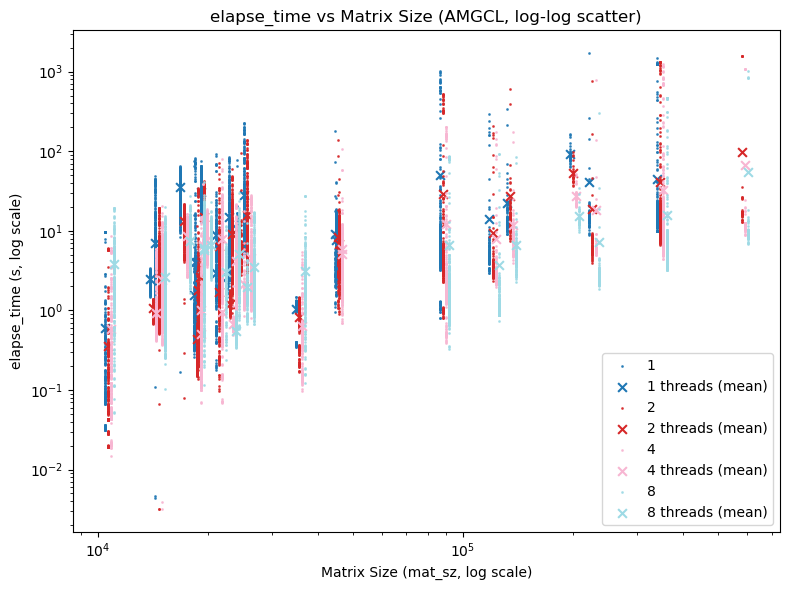

In [5]:
current_solver = "AMGCL"
df1 = df[df["solver_name"] == current_solver]
df1 = df1[df1["mat_sz"]>=1e4]

thread_values = sorted(df1["num_threads"].unique())
cmap = cm.get_cmap("tab20", len(thread_values))


plt.figure(figsize=(8, 6))

# Scatter for each solver
offset = 1
for idx, (nthreads, sdf) in enumerate(df1.groupby("num_threads")):
    
    color = cmap(idx)   # same color for raw + mean

    plt.scatter(
        sdf["mat_sz"]*offset,
        sdf["elapse_time"],
        s=1,                # point size
        alpha=0.8,           # transparency
        color = color,
        label=nthreads
    )

    g = sdf.groupby("mat_sz")["elapse_time"].mean().reset_index()
    g = g.sort_values("mat_sz")

    plt.scatter(
        g["mat_sz"] * offset,
        g["elapse_time"],
        s=40,                 # larger marker for mean
        marker="x",           # or "o"
        color = color,
        label=f"{nthreads} threads (mean)"
    )
    
    offset *= 1.02



plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("elapse_time (s, log scale)")
plt.title(f"elapse_time vs Matrix Size ({current_solver}, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3781920/2993282893.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(thread_values))


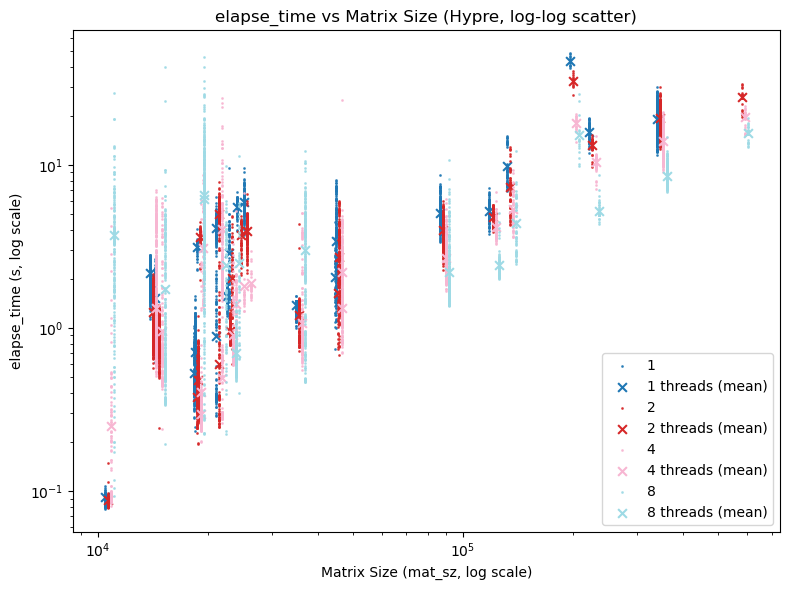

In [6]:
current_solver = "Hypre"
df1 = df[df["solver_name"] == current_solver]
# df1 = df1[(df1["mat_sz"]>=1e4) & (df1["mat_sz"]<1e5)]
df1 = df1[df1["mat_sz"]>=1e4]


thread_values = sorted(df1["num_threads"].unique())
cmap = cm.get_cmap("tab20", len(thread_values))


plt.figure(figsize=(8, 6))

# Scatter for each solver
offset = 1
for idx, (nthreads, sdf) in enumerate(df1.groupby("num_threads")):
    
    color = cmap(idx)   # same color for raw + mean

    plt.scatter(
        sdf["mat_sz"]*offset,
        sdf["elapse_time"],
        s=1,                # point size
        alpha=0.8,           # transparency
        color = color,
        label=nthreads
    )

    g = sdf.groupby("mat_sz")["elapse_time"].mean().reset_index()
    g = g.sort_values("mat_sz")

    plt.scatter(
        g["mat_sz"] * offset,
        g["elapse_time"],
        s=40,                 # larger marker for mean
        marker="x",           # or "o"
        color = color,
        label=f"{nthreads} threads (mean)"
    )
    
    offset *= 1.02



plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("elapse_time (s, log scale)")
plt.title(f"elapse_time vs Matrix Size ({current_solver}, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3781920/3301156490.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(thread_values))


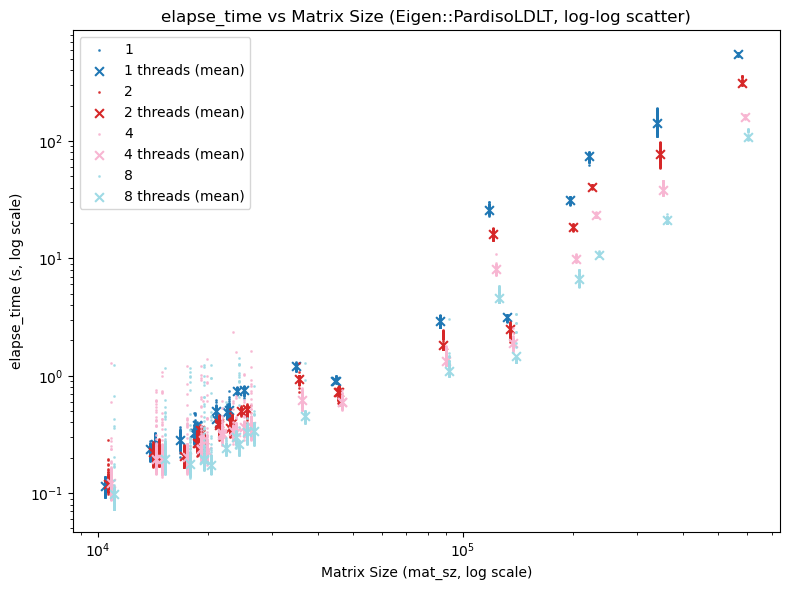

In [7]:
current_solver = "Eigen::PardisoLDLT"
df1 = df[df["solver_name"] == current_solver]
df1 = df1[df1["mat_sz"]>=1e4]

thread_values = sorted(df1["num_threads"].unique())
cmap = cm.get_cmap("tab20", len(thread_values))


plt.figure(figsize=(8, 6))

# Scatter for each solver
offset = 1
for idx, (nthreads, sdf) in enumerate(df1.groupby("num_threads")):
    
    color = cmap(idx)   # same color for raw + mean

    plt.scatter(
        sdf["mat_sz"]*offset,
        sdf["elapse_time"],
        s=1,                # point size
        alpha=0.8,           # transparency
        color = color,
        label=nthreads
    )

    g = sdf.groupby("mat_sz")["elapse_time"].mean().reset_index()
    g = g.sort_values("mat_sz")

    plt.scatter(
        g["mat_sz"] * offset,
        g["elapse_time"],
        s=40,                 # larger marker for mean
        marker="x",           # or "o"
        color = color,
        label=f"{nthreads} threads (mean)"
    )
    
    offset *= 1.02



plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("elapse_time (s, log scale)")
plt.title(f"elapse_time vs Matrix Size ({current_solver}, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


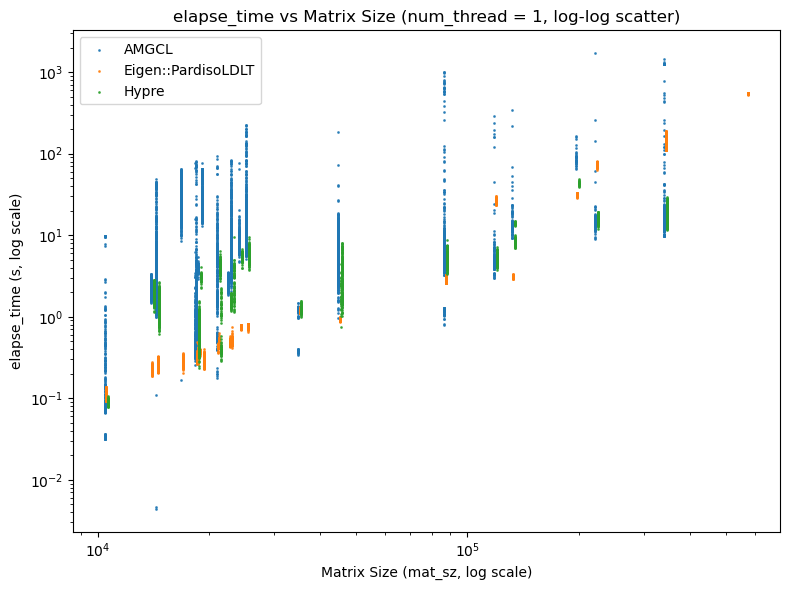

In [8]:
# Filter num_thread = 1
threads = 1
df1 = df[df["num_threads"] == threads]
df1 = df1[df1["mat_sz"]>=1e4]

plt.figure(figsize=(8, 6))
offset = 1
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["mat_sz"]*offset,
        sdf["elapse_time"],
        s=1,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
    offset *= 1.01

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("elapse_time (s, log scale)")
plt.title(f"elapse_time vs Matrix Size (num_thread = {threads}, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


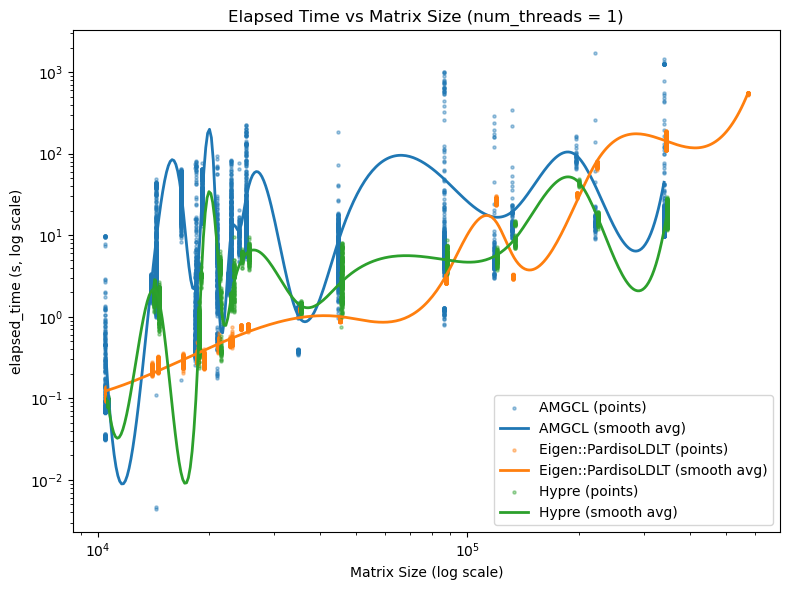

In [9]:

# Filter num_thread = 1
threads = 1
df1 = df[(df["num_threads"] == threads) & (df["mat_sz"] >= 1e4)]

plt.figure(figsize=(8, 6))
offset = 1.0

for solver, sdf in df1.groupby("solver_name"):

    # ---- Scatter plot ----
    plt.scatter(
        sdf["mat_sz"] * offset,
        sdf["elapse_time"],
        s=5,
        alpha=0.4,
        label=f"{solver} (points)"
    )

    # ---- Compute averages ----
    g = sdf.groupby("mat_sz")["elapse_time"].mean().reset_index()
    g = g.sort_values("mat_sz")

    # Convert to log space
    log_x = np.log(g["mat_sz"].values)
    log_y = np.log(g["elapse_time"].values)

    # ---- Smooth cubic spline in log-log space ----
    spline = UnivariateSpline(log_x, log_y, s=1)  
    # s controls smoothness: larger s = smoother line

    # Dense sampling
    x_dense = np.logspace(
        np.log10(g["mat_sz"].min()),
        np.log10(g["mat_sz"].max()),
        300
    )

    y_dense = np.exp(spline(np.log(x_dense)))

    # ---- Plot spline line ----
    plt.plot(
        x_dense * offset,
        y_dense,
        linewidth=2,
        label=f"{solver} (smooth avg)"
    )

    offset *= 1.01  # small shift for next solver


plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (log scale)")
plt.ylabel("elapsed_time (s, log scale)")
plt.title(f"Elapsed Time vs Matrix Size (num_threads = {threads})")

plt.legend()
plt.tight_layout()
plt.show()


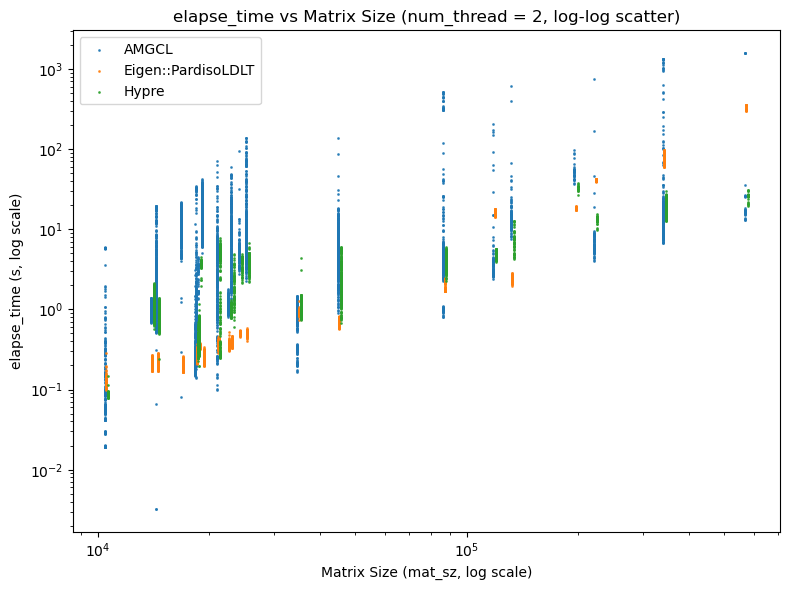

In [10]:
# Filter num_thread = 1
threads = 2
df1 = df[df["num_threads"] == threads]
df1 = df1[df1["mat_sz"]>=1e4]

plt.figure(figsize=(8, 6))
offset = 1
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["mat_sz"]*offset,
        sdf["elapse_time"],
        s=1,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
    offset *= 1.01

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("elapse_time (s, log scale)")
plt.title(f"elapse_time vs Matrix Size (num_thread = {threads}, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


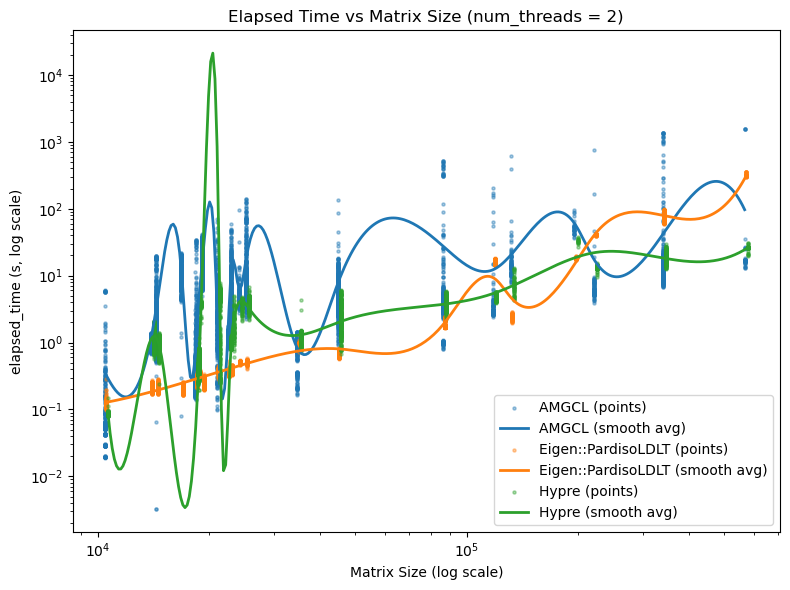

In [11]:

# Filter num_thread = 1
threads = 2
df1 = df[(df["num_threads"] == threads) & (df["mat_sz"] >= 1e4)]

plt.figure(figsize=(8, 6))
offset = 1.0

for solver, sdf in df1.groupby("solver_name"):

    # ---- Scatter plot ----
    plt.scatter(
        sdf["mat_sz"] * offset,
        sdf["elapse_time"],
        s=5,
        alpha=0.4,
        label=f"{solver} (points)"
    )

    # ---- Compute averages ----
    g = sdf.groupby("mat_sz")["elapse_time"].mean().reset_index()
    g = g.sort_values("mat_sz")

    # Convert to log space
    log_x = np.log(g["mat_sz"].values)
    log_y = np.log(g["elapse_time"].values)

    # ---- Smooth cubic spline in log-log space ----
    spline = UnivariateSpline(log_x, log_y, s=1)  
    # s controls smoothness: larger s = smoother line

    # Dense sampling
    x_dense = np.logspace(
        np.log10(g["mat_sz"].min()),
        np.log10(g["mat_sz"].max()),
        300
    )

    y_dense = np.exp(spline(np.log(x_dense)))

    # ---- Plot spline line ----
    plt.plot(
        x_dense * offset,
        y_dense,
        linewidth=2,
        label=f"{solver} (smooth avg)"
    )

    offset *= 1.01  # small shift for next solver


plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (log scale)")
plt.ylabel("elapsed_time (s, log scale)")
plt.title(f"Elapsed Time vs Matrix Size (num_threads = {threads})")

plt.legend()
plt.tight_layout()
plt.show()


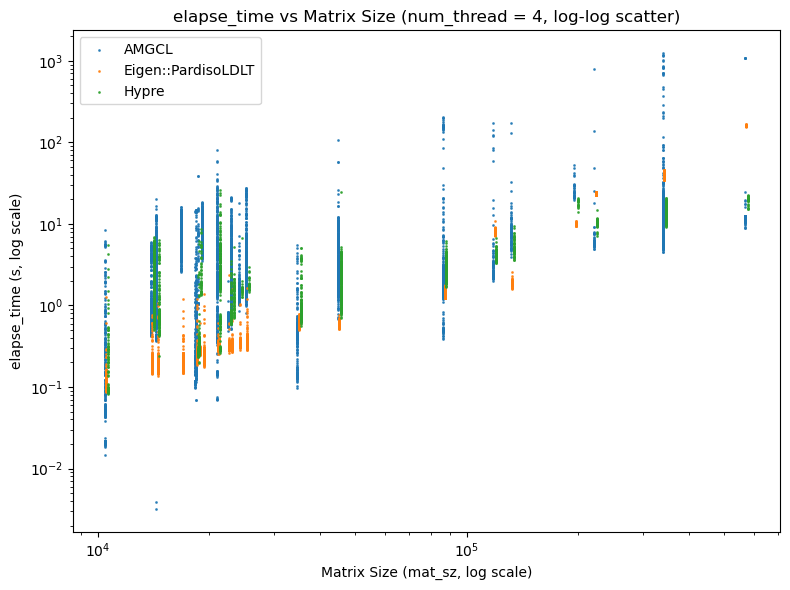

In [12]:
# Filter num_thread = 1
threads = 4
df1 = df[df["num_threads"] == threads]
df1 = df1[df1["mat_sz"]>=1e4]

plt.figure(figsize=(8, 6))
offset = 1
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["mat_sz"]*offset,
        sdf["elapse_time"],
        s=1,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
    offset *= 1.01

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("elapse_time (s, log scale)")
plt.title(f"elapse_time vs Matrix Size (num_thread = {threads}, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


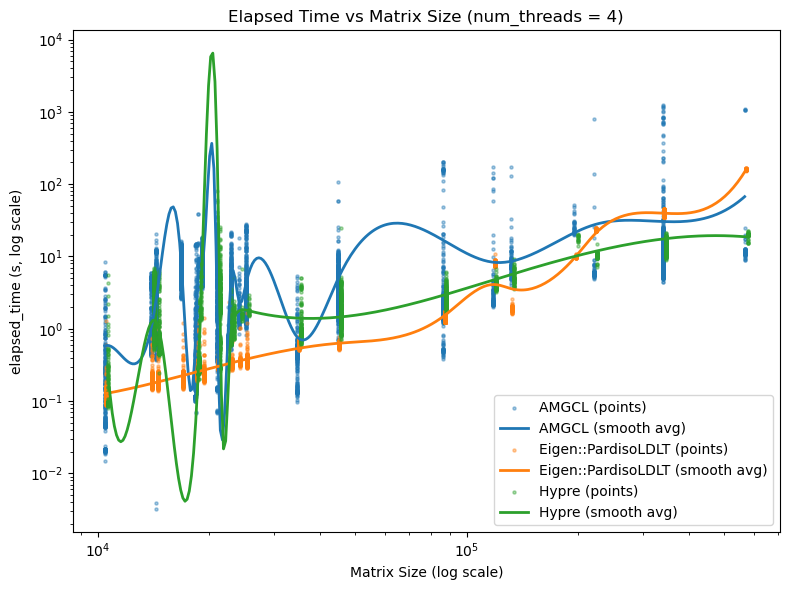

In [13]:

# Filter num_thread = 1
threads = 4
df1 = df[(df["num_threads"] == threads) & (df["mat_sz"] >= 1e4)]

plt.figure(figsize=(8, 6))
offset = 1.0

for solver, sdf in df1.groupby("solver_name"):

    # ---- Scatter plot ----
    plt.scatter(
        sdf["mat_sz"] * offset,
        sdf["elapse_time"],
        s=5,
        alpha=0.4,
        label=f"{solver} (points)"
    )

    # ---- Compute averages ----
    g = sdf.groupby("mat_sz")["elapse_time"].mean().reset_index()
    g = g.sort_values("mat_sz")

    # Convert to log space
    log_x = np.log(g["mat_sz"].values)
    log_y = np.log(g["elapse_time"].values)

    # ---- Smooth cubic spline in log-log space ----
    spline = UnivariateSpline(log_x, log_y, s=1)  
    # s controls smoothness: larger s = smoother line

    # Dense sampling
    x_dense = np.logspace(
        np.log10(g["mat_sz"].min()),
        np.log10(g["mat_sz"].max()),
        300
    )

    y_dense = np.exp(spline(np.log(x_dense)))

    # ---- Plot spline line ----
    plt.plot(
        x_dense * offset,
        y_dense,
        linewidth=2,
        label=f"{solver} (smooth avg)"
    )

    offset *= 1.01  # small shift for next solver


plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (log scale)")
plt.ylabel("elapsed_time (s, log scale)")
plt.title(f"Elapsed Time vs Matrix Size (num_threads = {threads})")

plt.legend()
plt.tight_layout()
plt.show()


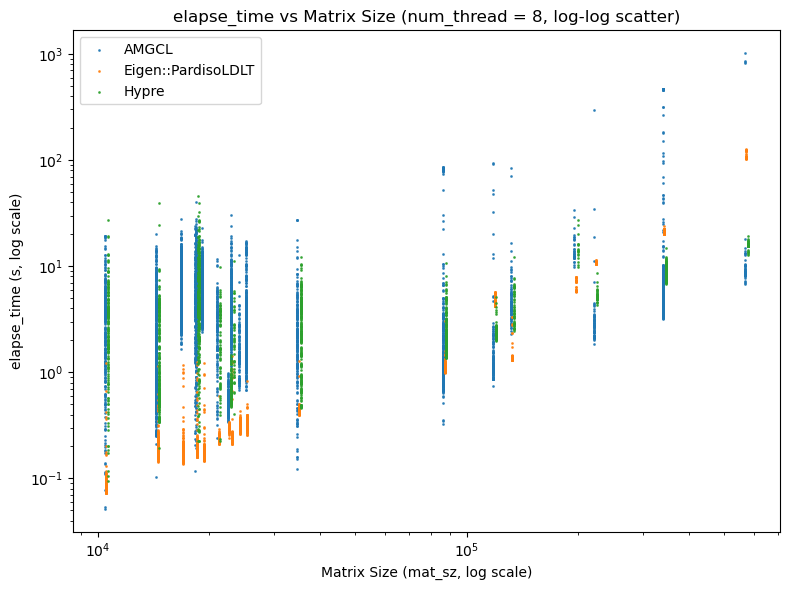

In [14]:
# Filter num_thread = 1
threads = 8
df1 = df[df["num_threads"] == threads]
df1 = df1[df1["mat_sz"]>=1e4]

plt.figure(figsize=(8, 6))
offset = 1
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["mat_sz"]*offset,
        sdf["elapse_time"],
        s=1,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
    offset *= 1.01

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("elapse_time (s, log scale)")
plt.title(f"elapse_time vs Matrix Size (num_thread = {threads}, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


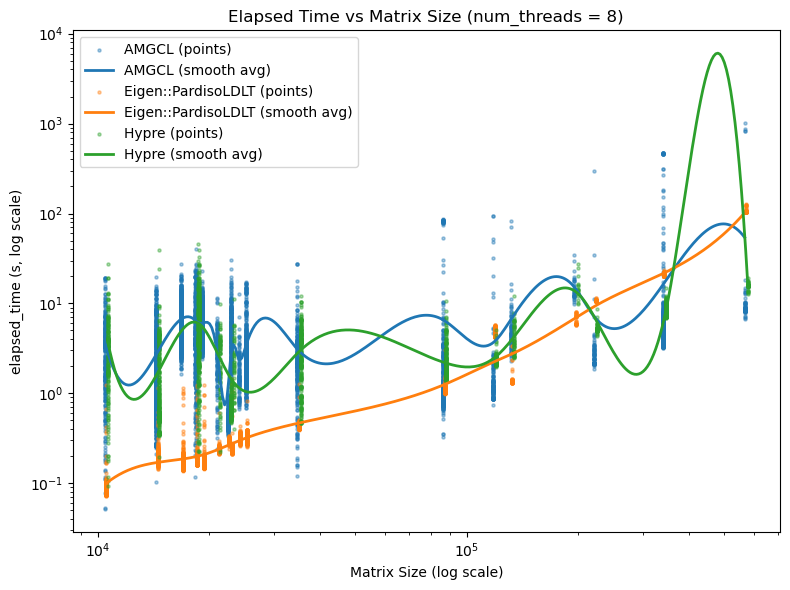

In [15]:

# Filter num_thread = 1
threads = 8
df1 = df[(df["num_threads"] == threads) & (df["mat_sz"] >= 1e4)]

plt.figure(figsize=(8, 6))
offset = 1.0

for solver, sdf in df1.groupby("solver_name"):

    # ---- Scatter plot ----
    plt.scatter(
        sdf["mat_sz"] * offset,
        sdf["elapse_time"],
        s=5,
        alpha=0.4,
        label=f"{solver} (points)"
    )

    # ---- Compute averages ----
    g = sdf.groupby("mat_sz")["elapse_time"].mean().reset_index()
    g = g.sort_values("mat_sz")

    # Convert to log space
    log_x = np.log(g["mat_sz"].values)
    log_y = np.log(g["elapse_time"].values)

    # ---- Smooth cubic spline in log-log space ----
    spline = UnivariateSpline(log_x, log_y, s=1)  
    # s controls smoothness: larger s = smoother line

    # Dense sampling
    x_dense = np.logspace(
        np.log10(g["mat_sz"].min()),
        np.log10(g["mat_sz"].max()),
        300
    )

    y_dense = np.exp(spline(np.log(x_dense)))

    # ---- Plot spline line ----
    plt.plot(
        x_dense * offset,
        y_dense,
        linewidth=2,
        label=f"{solver} (smooth avg)"
    )

    offset *= 1.01  # small shift for next solver


plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (log scale)")
plt.ylabel("elapsed_time (s, log scale)")
plt.title(f"Elapsed Time vs Matrix Size (num_threads = {threads})")

plt.legend()
plt.tight_layout()
plt.show()
